# THE SPARK FOUNDATION
## TASK 1
### PREDICTION USING SUPERVISED MACHINE LEARNING
Predict the percentage of student based on the number of study hours.

In [1]:
# Setting working directory
import os
os.chdir("C:\\Users\\deepi\\Desktop\\data science\\Internship\\SPARK")

In [2]:
# Importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Supress warning
import warnings
warnings.filterwarnings("ignore")

## Understanding Data

In [4]:
# data import
data = pd.read_excel("TASK 1.xlsx")

In [5]:
# View some sample records
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [6]:
# Shape of the data
data.shape

(25, 2)

In [7]:
# Information like data type, null values in the data set
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [8]:
# Statistical summary of data
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


## Visualizing Data
### Univariate Analysis

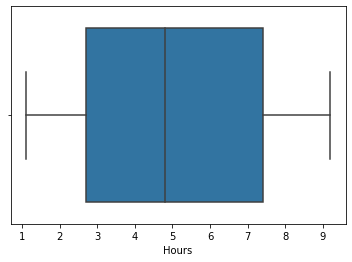

In [9]:
# Boxplot - Hours
sns.boxplot("Hours", data = data)
plt.show()

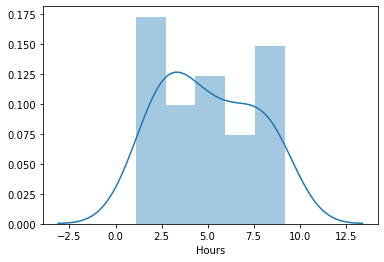

In [10]:
# Distribution of varibale Hours
sns.distplot(data["Hours"], bins= 5)
plt.show()

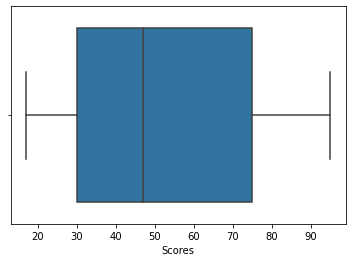

In [11]:
# Boxplot - Scores
sns.boxplot("Scores", data = data)
plt.show()

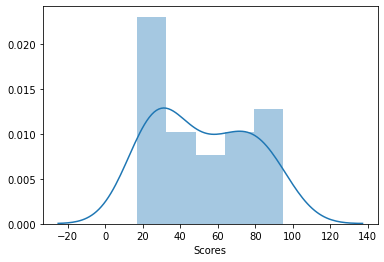

In [12]:
# Distribution of varibale Scores
sns.distplot(data["Scores"], bins= 5)
plt.show()

### Bivariate Analysis

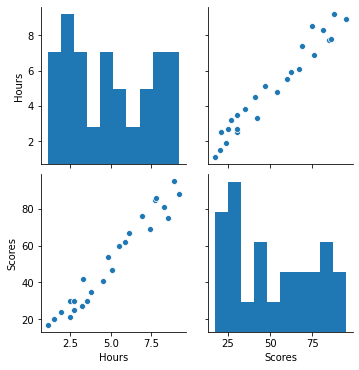

In [13]:
# Scatter plot between hours and scores
sns.pairplot(data)
plt.show()

In [14]:
# correlation between Hours and Scores
data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


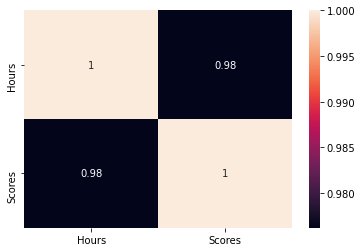

In [15]:
# Visualizing correlation between Hours and Scores
sns.heatmap(data.corr(), annot= True)
plt.show()

## Model Building
### Simple Linear Regression
Equation of linear regression<br>
$ y = c + m_1x_1 + m_2x_2 + ... + m_nx_n $

$y = c + m_1 \times Hours$

In [16]:
# Defining the feature variable and the response variable
X = data['Hours']
y = data['Scores']

### Train Test Split

In [17]:
#importing library for train test split
from sklearn.model_selection import train_test_split

In [18]:
#split data into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 50)

In [19]:
# feature variable head
X_train.head()

3     8.5
19    7.4
7     5.5
10    7.7
2     3.2
Name: Hours, dtype: float64

In [20]:
# response variable head
y_train.head()

3     75
19    69
7     60
10    85
2     27
Name: Scores, dtype: int64

## Building Linear Model (Using Statsmodel library)

In [21]:
# Importing library for building linear model 
import statsmodels.api as sm

In [22]:
# Add a constant
x_train_sm = sm.add_constant(X_train)
# fit the regression line using 'OLS'
lr = sm.OLS(y_train, x_train_sm).fit()

In [23]:
#print the parameters
print(lr.params)

const    3.784308
Hours    9.521606
dtype: float64


In [24]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                 Scores   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                     232.5
Date:                Sat, 06 Feb 2021   Prob (F-statistic):           1.54e-10
Time:                        16:38:23   Log-Likelihood:                -53.827
No. Observations:                  17   AIC:                             111.7
Df Residuals:                      15   BIC:                             113.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.7843      3.503      1.080      0.2

#### 1. R - squared is 0.939
Meaning that 93.9% of the variance in `Scores` is explained by 'Hours'

#### 2. The coefficient for Hours is 9.5216, with a very low p value (p value = 0)
The coefficient is statistically significant. So the association is not purely by chance. 

#### 3. F statistic has a very low p value (practically low)
The model fit is statistically significant, and the explained variance isn't purely by chance.

Scores = 3.7843 + 9.5216*Hours 

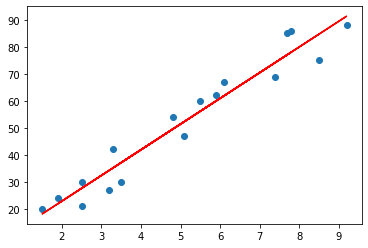

In [25]:
# Visualize the model
plt.scatter(X_train, y_train)
plt.plot(X_train, 3.7843 + 9.5216*X_train, 'r')
plt.show()

In [26]:
# predicted value of scores 
y_train_pred = lr.predict(x_train_sm)


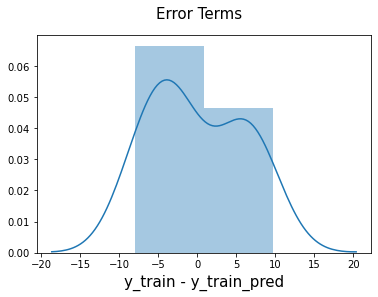

In [27]:
## Checking linear regression assumption
res = y_train_pred - y_train
fig = plt.figure()
sns.distplot(res, bins = 2)
fig.suptitle('Error Terms', fontsize = 15)                  # Plot heading 
plt.xlabel('y_train - y_train_pred', fontsize = 15)         # X-label
plt.show()

The residuals are following the Bi model distribution and not normally distributed with a mean 0.Therefore, we need more number of data points to train the model.

### Prediction On The Test Data

In [28]:
# add constant
x_test_sm = sm.add_constant(X_test)
# predicting the y values corresponding to X_test
y_test_pred  = lr.predict(x_test_sm) 

In [29]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [30]:
# RMSE
np.sqrt(mean_squared_error(y_test, y_test_pred))

4.636798722184971

In [31]:
# r-squared
print("r-squared_train:", r2_score(y_train, y_train_pred))
print("r-squared_test:", r2_score(y_test, y_test_pred))

r-squared_train: 0.9393866419807256
r-squared_test: 0.9717199573955196


In [32]:
# What will be predicted score if a student studies for 9.25 hrs/ day?
Score = 3.7843 + 9.5216*9.25
print("When a student studying for 9.25 hours then he/she will score: ", Score)

When a student studying for 9.25 hours then he/she will score:  91.8591
